The dataset is given in this link: [https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)

The training dataset consists of 2000 samples with 21 features:
- battery_power (int64): Total energy a battery can store in one time measured in mAh.
- blue: Has bluetooth or not.
- clock_speed (float64): speed at which microprocessor executes instructions.
- dual_sim (1 or 0): Has dual sim support or not.
- fc (int64): Front Camera mega pixels.
- four_g (1 or 0): Has 4G or not.
- int_memory (int64): Internal Memory in Gigabytes.
- m_dep (float64): Mobile Depth in cm.
- mobile_wt (int64): Weight of mobile phone.
- n_cores (int64): Number of cores of processor.
- pc (int64): Primary Camera mega pixels.
- px_height (int64): Pixel Resolution Height.
- px_width (int64): Pixel Resolution Width.
- ram (int64): Random Access Memory in Mega Bytes.
- sc_h (int64): Screen Height of mobile in cm.
- sc_w (int64): Screen Width of mobile in cm.
- talk_time (int64): longest time that a single battery charge will last when you are.
- three_g (1 or 0): Has 3G or not.
- touch_screen (1 or 0): Has touch screen or not.
- wifi (1 or 0): Has wifi or not.
- price_range: This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost).

The test dataset consists of 1000 samples with 21 features, matching the structure of the training set but without the target variable `price_range`. The `id` column, which is irrelevant for modeling, will be removed in preprocessing.

We will perform data classification using the following models:
1. **Naive Bayes Classifier**
2. **Softmax Regression**
3. **Support Vector Machine** (Soft Margin SVM)
4. **Multi-Layer Perceptron** (with 1 hidden layer of size 100).

The models will be trained on the dataset with an 8:2 train-test split ratio, and their performance will be evaluated to determine which model achieves the highest accuracy.

Once the best-performing model is identified, it will be used to predict the labels for the test set (which lacks ground-truth labels).

In [1]:
# Read data from Google Drive to use Google Colab
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

train_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/train.csv')
test_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [3]:
train_set.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [4]:
train_set.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


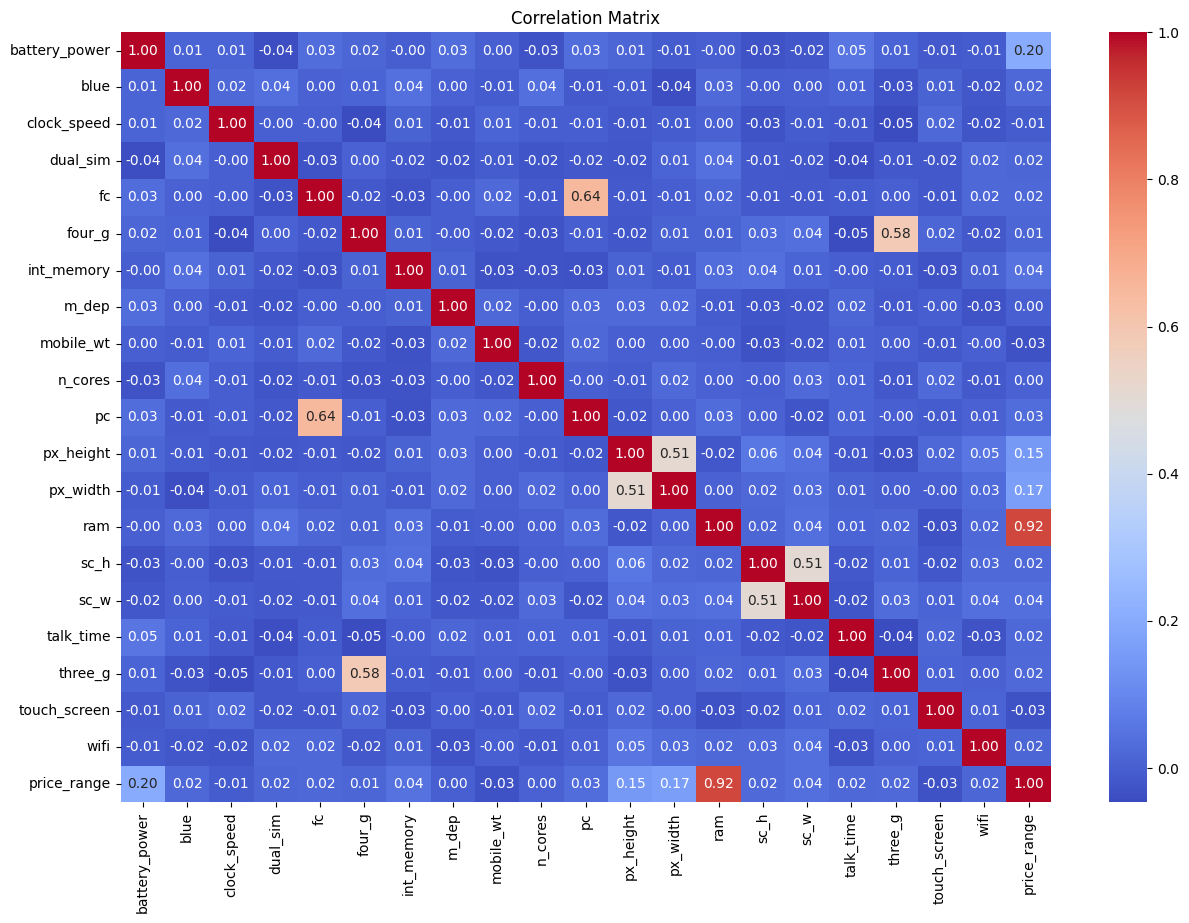

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
correlation_matrix = train_set.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

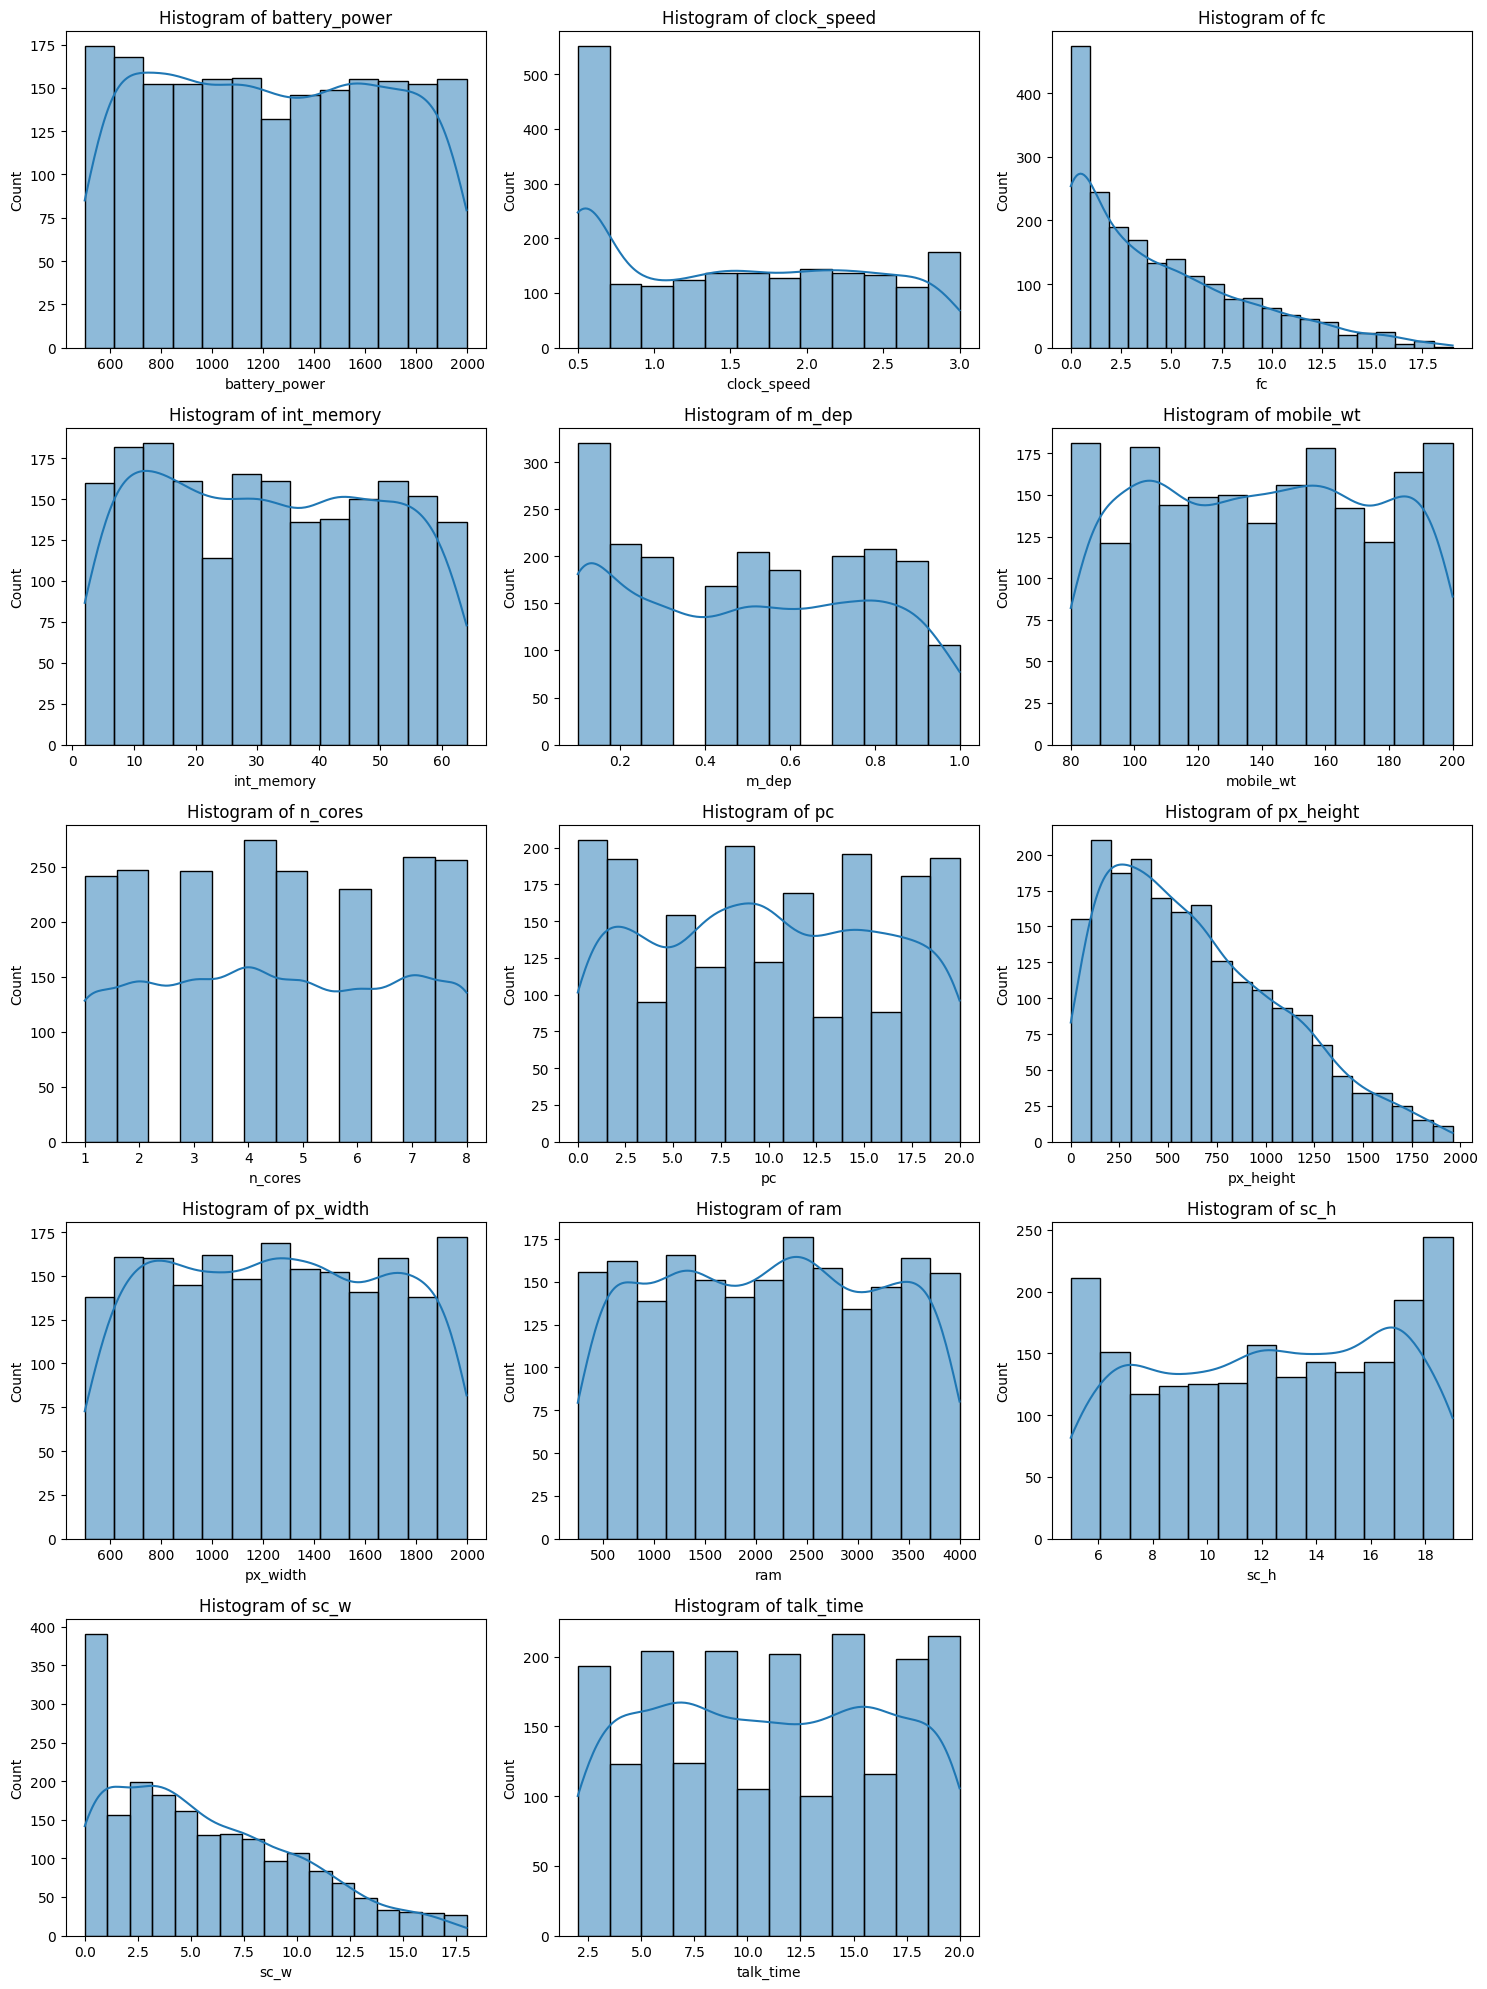

In [6]:
columns = train_set.drop(['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range'],
                         axis=1).columns

figs, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.histplot(data=train_set, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f"Histogram of {col}")

for j in range(i + 1, len(axes)):
    figs.delaxes(axes[j])

plt.tight_layout()
plt.show()

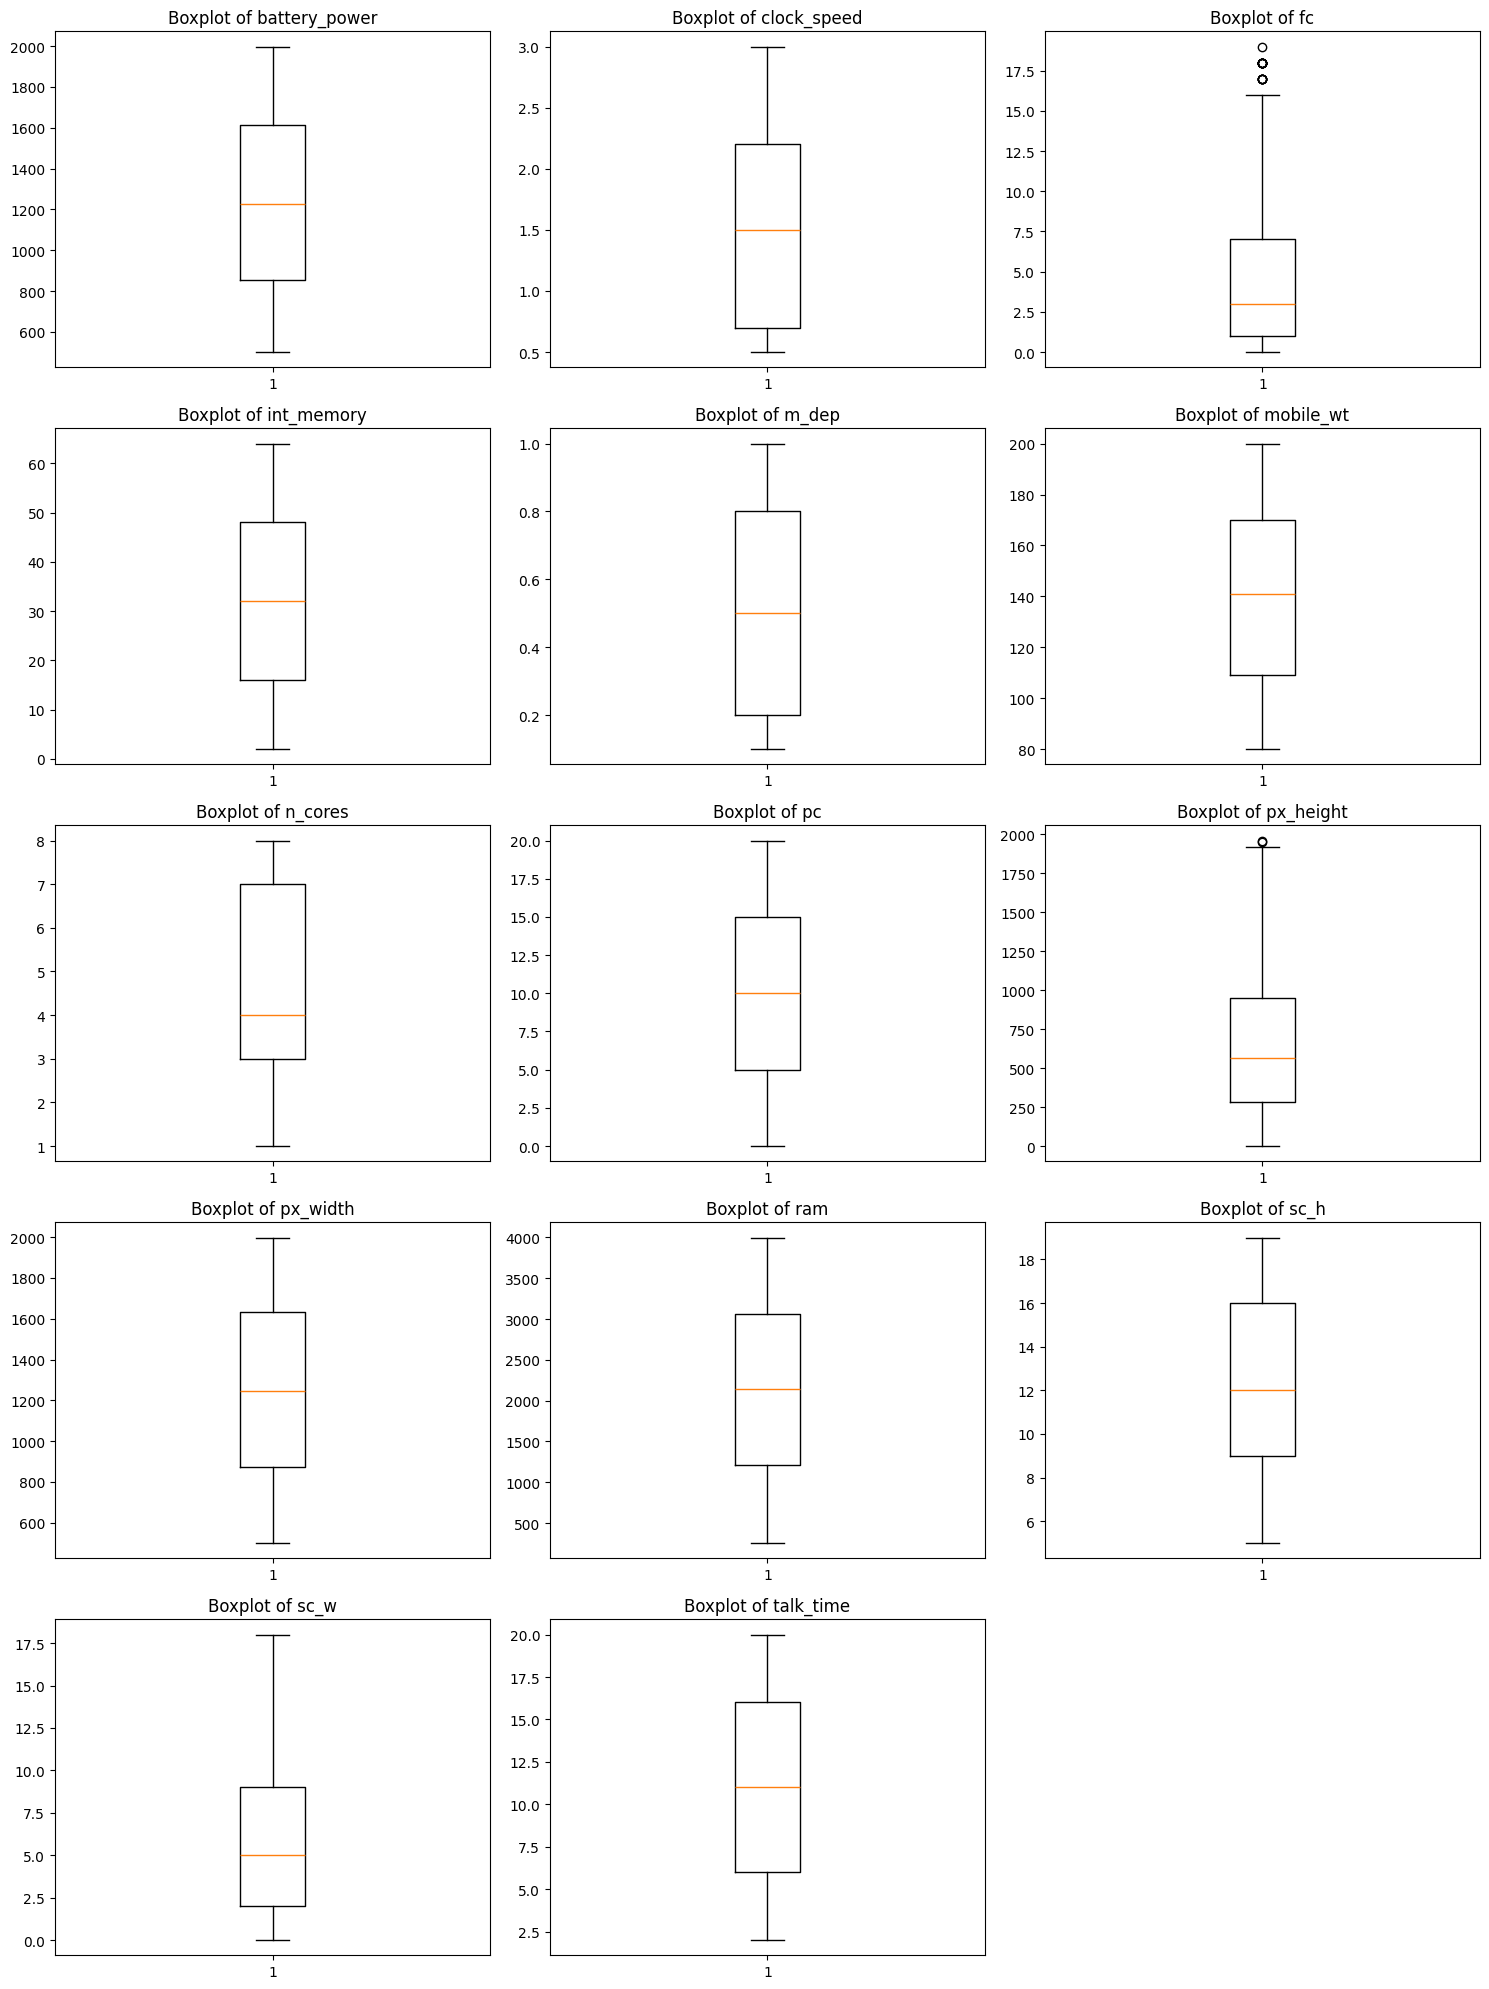

In [7]:
figs, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(columns):
    axes[i].boxplot(train_set[col].dropna())
    axes[i].set_title(f"Boxplot of {col}")

for j in range(i + 1, len(axes)):
    figs.delaxes(axes[j])

plt.tight_layout()
plt.show()

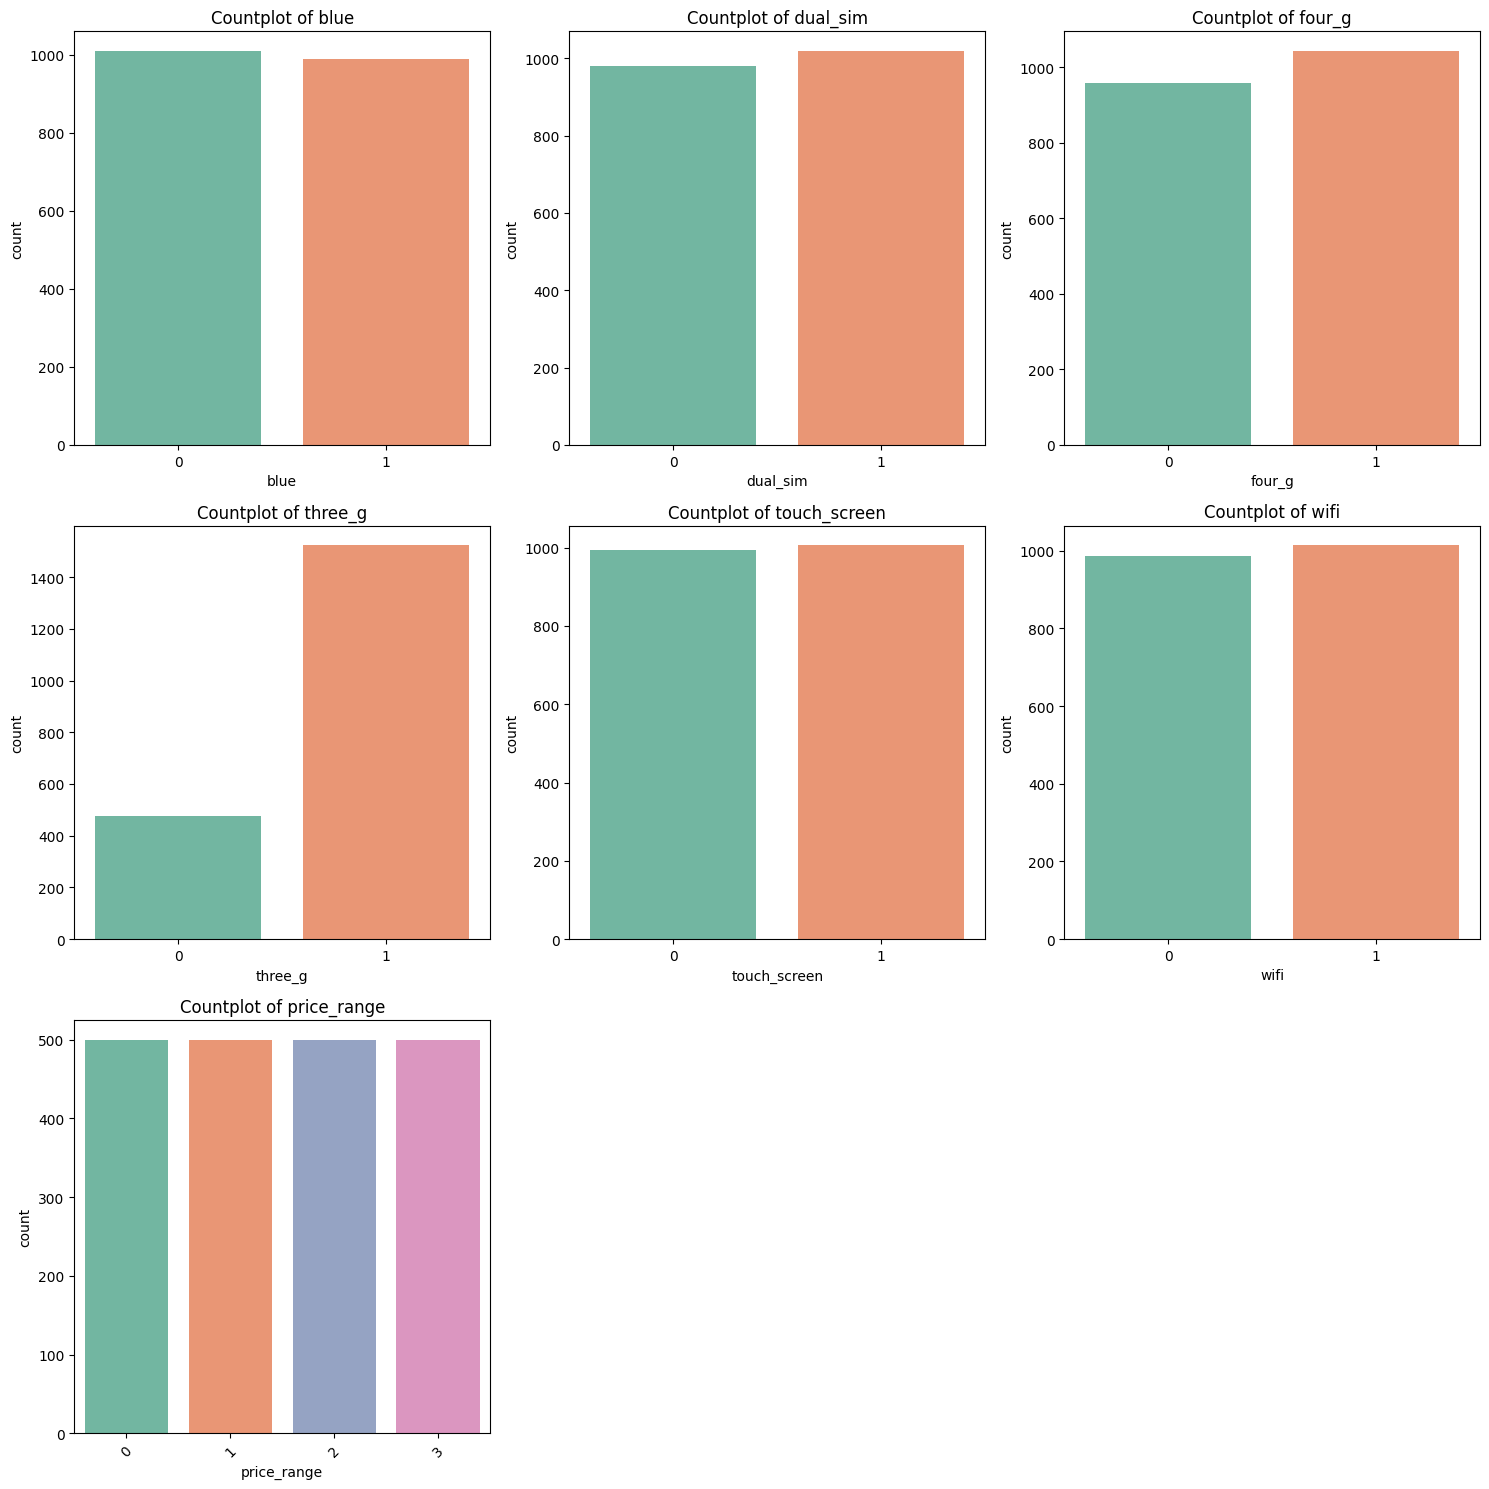

In [8]:
columns = ["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi", "price_range"]

figs, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(data=train_set, x=col, hue=col, ax=axes[i], palette="Set2", legend=False)
    axes[i].set_title(f"Countplot of {col}")

for j in range(i + 1, len(axes)):
    figs.delaxes(axes[j])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

x_data = train_set.drop('price_range', axis=1)
x_data = StandardScaler().fit_transform(x_data)  # Standardize data
y_data = train_set['price_range']

# One-hot encoding
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_features = ["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi"]
original = train_set.drop('price_range', axis=1)
encoded = one_hot_encoder.fit_transform(original[categorical_features])
train_df = pd.DataFrame(encoded, columns=one_hot_encoder.get_feature_names_out(categorical_features))
numerical_features = original.drop(categorical_features, axis=1)
x_data = pd.concat([numerical_features, train_df], axis=1)

# Standardize the data after one-hot encoding
x_data = StandardScaler().fit_transform(x_data)

# Split train set and evaluation set
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

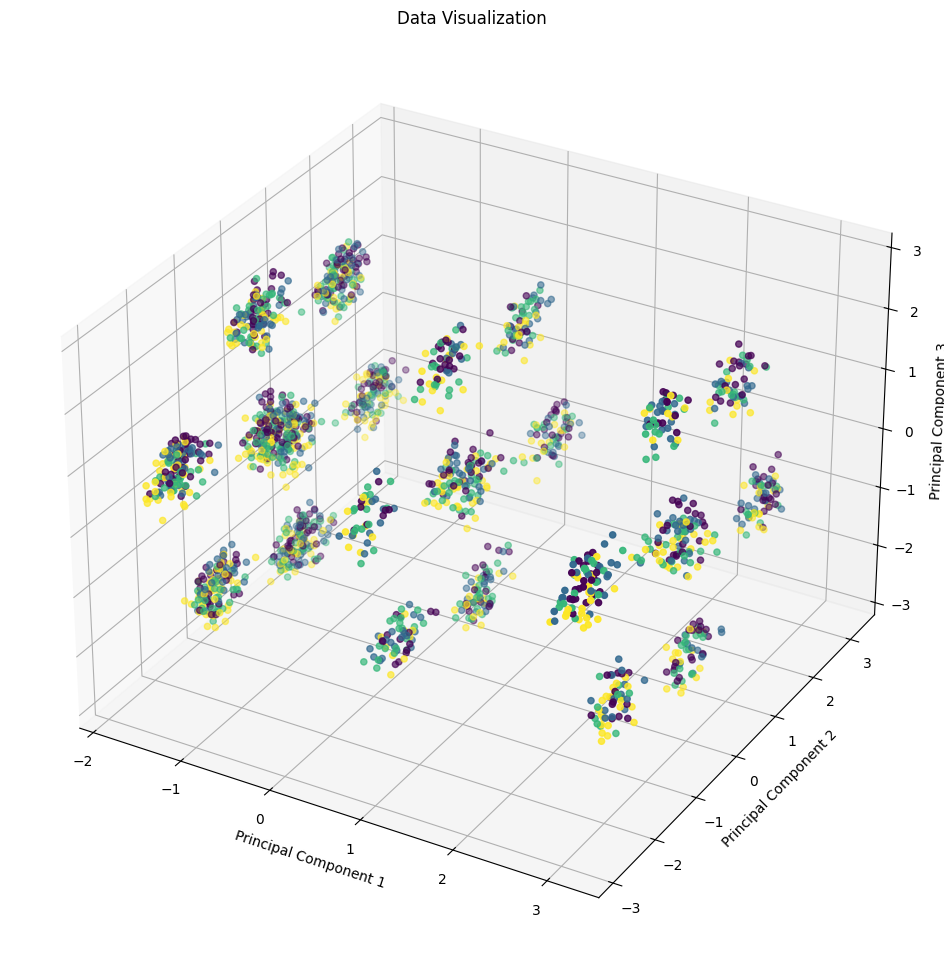

In [10]:
from sklearn.decomposition import PCA

# Dimensional reduction
pca = PCA(n_components=3, random_state=42)
x_data_pca = pca.fit_transform(x_data)

# Data Visualization
pca_x = x_data_pca[:, 0]
pca_y = x_data_pca[:, 1]
pca_z = x_data_pca[:, 2]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_x, pca_y, pca_z, c=y_data, cmap='viridis')
ax.set_title('Data Visualization')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

In [11]:
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Naive Bayes Classifier
naive_bayes = GaussianNB()

start_time = time.perf_counter()
naive_bayes.fit(x_train, y_train)
end_time = time.perf_counter()

# Evaluate model
y_pred = naive_bayes.predict(x_test)
print(f"Execution time: {end_time - start_time} seconds")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Execution time: 0.01952148300006229 seconds
Accuracy: 0.7925
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       105
           1       0.75      0.67      0.71        91
           2       0.63      0.77      0.70        92
           3       0.89      0.80      0.85       112

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.80      0.79      0.79       400



In [12]:
from sklearn.linear_model import LogisticRegression

# Softmax Regression
softmax = LogisticRegression(max_iter=200, solver='saga')

start_time = time.perf_counter()
softmax.fit(x_train, y_train)
end_time = time.perf_counter()

# Evaluate model
y_pred_softmax = softmax.predict(x_test)
print(f"Execution time: {end_time - start_time} seconds")
print(f"Accuracy: {accuracy_score(y_test, y_pred_softmax)}")
print(classification_report(y_test, y_pred_softmax))

Execution time: 0.24640170099974057 seconds
Accuracy: 0.975
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.94      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400



In [13]:
from sklearn.svm import SVC

# Support Vector Machine
svm = SVC(kernel='linear', C=10)  # Soft margins

start_time = time.perf_counter()
svm.fit(x_train, y_train)
end_time = time.perf_counter()

# Evaluate model
y_pred_svm = svm.predict(x_test)
print(f"Execution time: {end_time - start_time} seconds")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(classification_report(y_test, y_pred_svm))

Execution time: 0.624435154999901 seconds
Accuracy: 0.9725
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       105
           1       0.92      1.00      0.96        91
           2       0.99      0.96      0.97        92
           3       0.98      0.99      0.99       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [14]:
from sklearn.neural_network import MLPClassifier

# Multi Layers Perceptron
ann = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, random_state=42)

start_time = time.perf_counter()
ann.fit(x_train, y_train)
end_time = time.perf_counter()

# Evaluate model
y_pred_ann = ann.predict(x_test)
print(f"Execution time: {end_time - start_time} seconds")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ann)}")
print(classification_report(y_test, y_pred_ann))

Execution time: 7.723836987000141 seconds
Accuracy: 0.9225
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       105
           1       0.89      0.93      0.91        91
           2       0.88      0.89      0.89        92
           3       0.95      0.92      0.94       112

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [15]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [16]:
test_set.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [17]:
test_id = test_set['id']
x_test_set = test_set.drop('id', axis=1)
x_test_set = StandardScaler().fit_transform(x_test_set)

# One-hot encoding
original_test = test_set.drop('id', axis=1)
encoded_test = one_hot_encoder.transform(original_test[categorical_features])
test_df = pd.DataFrame(encoded_test, columns=one_hot_encoder.get_feature_names_out(categorical_features))
numerical_features_test = original_test.drop(categorical_features, axis=1)
x_test_set = pd.concat([numerical_features_test, test_df], axis=1)

# Standardize the data after one-hot encoding
x_test_set = StandardScaler().fit_transform(x_test_set)

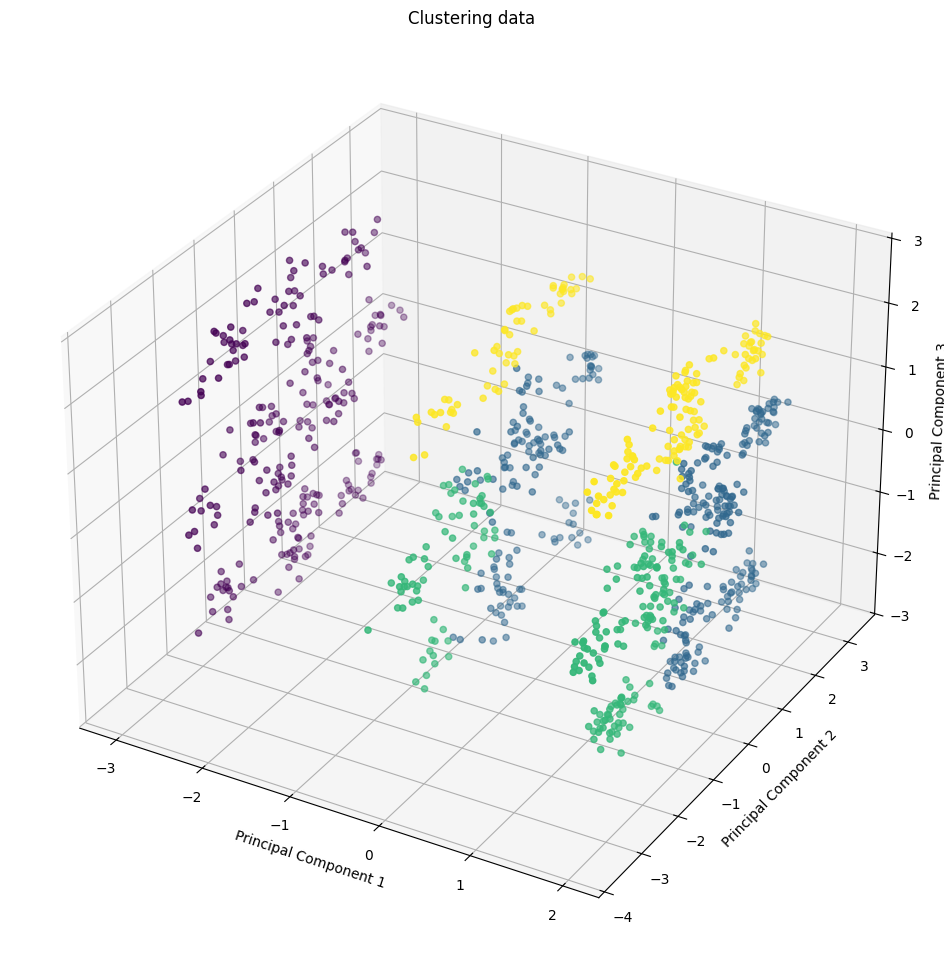

In [18]:
from sklearn.mixture import GaussianMixture

# Dimensional reduction
x_test_set_pca = pca.fit_transform(x_test_set)

# Clustering data
gmm = GaussianMixture(n_components=4, random_state=42)
clusters = gmm.fit_predict(x_test_set_pca)

# Data Visualization
pca_x = x_test_set_pca[:, 0]
pca_y = x_test_set_pca[:, 1]
pca_z = x_test_set_pca[:, 2]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_x, pca_y, pca_z, c=clusters, cmap='viridis')
ax.set_title('Clustering data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

In [19]:
y_predict = softmax.predict(x_test_set)

for id, res in zip(test_id, y_predict):
    if res == 0:
        res = "Low cost"
    elif res == 1:
        res = "Medium cost"
    elif res == 2:
        res = "High cost"
    else:
        res = "Very High cost"
    print(f"Phone {id} has {res} price")

Phone 1 has Very High cost price
Phone 2 has Very High cost price
Phone 3 has High cost price
Phone 4 has Very High cost price
Phone 5 has Medium cost price
Phone 6 has Very High cost price
Phone 7 has Very High cost price
Phone 8 has Medium cost price
Phone 9 has Very High cost price
Phone 10 has Low cost price
Phone 11 has Very High cost price
Phone 12 has Very High cost price
Phone 13 has Low cost price
Phone 14 has Low cost price
Phone 15 has High cost price
Phone 16 has Low cost price
Phone 17 has High cost price
Phone 18 has Medium cost price
Phone 19 has Very High cost price
Phone 20 has High cost price
Phone 21 has Medium cost price
Phone 22 has Very High cost price
Phone 23 has Medium cost price
Phone 24 has Medium cost price
Phone 25 has Very High cost price
Phone 26 has Low cost price
Phone 27 has High cost price
Phone 28 has Low cost price
Phone 29 has Very High cost price
Phone 30 has Low cost price
Phone 31 has High cost price
Phone 32 has Low cost price
Phone 33 has Very